In [1]:
import numpy as np 
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data_folder = r"C:\Users\pipi3\Desktop\Course\year3_sem3 (Japan)\FYP\input_data\vgchartz";

In [3]:
#raw data
df = pd.read_excel(data_folder+"\\Global Yearly Chart.xlsx", sheetname='2014')
df.head()

,Rank,Game,Platform,Publisher,Genre,Week,Yearly,Total
0,1,Pokemon Omega Ruby and Alpha Sapphire,3DS,Nintendo,Role-Playing,7,7527047,7527047
1,2,Call of Duty: Advanced Warfare,PS4,Activision,Shooter,9,5684918,5684918
2,3,Super Smash Bros. for Nintendo 3DS,3DS,Nintendo,Fighting,17,5546831,5546831
3,4,Grand Theft Auto V,PS4,Take-Two Interactive,Action,7,5411940,5411940
4,5,FIFA 15,PS4,Electronic Arts,Sports,15,5182426,5182426


In [4]:
#platform = nintendo + sony + microsoft
nintendo = ['3DS', 'DS', 'NS','Wii', 'WiiU']
sony = ['PS3', 'PS4', 'PSP', 'PSV']
microsoft = ['X360', 'XOne']
company = ['Nintendo', 'Sony', 'Microsoft'] 

In [5]:
#create pivot table (Publisher vs Count of Platform in 2017)
df = pd.read_excel(data_folder+"\\Global Yearly Chart.xlsx", sheetname='2008')
pt = df.pivot_table(values='Game', columns='Platform', index=['Publisher'], aggfunc='count').fillna(0)
pt.reset_index(level=0, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format

In [6]:
pt['Nintendo'] = 0
pt['Sony'] = 0
pt['Microsoft'] = 0

for nin in nintendo:
    for colname in pt.columns:
        if(nin == colname):
            pt['Nintendo'] += pt[colname]

for sy in sony:
    for colname in pt.columns:
        if(sy == colname):
            pt['Sony'] += pt[colname]
            
for mic in microsoft:
    for colname in pt.columns:
        if(mic == colname):
            pt['Microsoft'] += pt[colname]
pt

Platform,Publisher,DS,PS3,PSP,Wii,X360,Nintendo,Sony,Microsoft
0,505 Games,2,0,0,0,0,2,0,0
1,Activision,2,3,0,2,6,4,3,6
2,Bethesda Softworks,0,1,0,0,1,0,1,1
3,Capcom,0,2,3,0,2,0,5,2
4,Electronic Arts,1,2,0,0,5,1,2,5
5,Hudson Soft,0,0,0,1,0,1,0,0
6,Konami,0,2,0,0,0,0,2,0
7,LucasArts,1,1,0,3,1,4,1,1
8,Microsoft,0,0,0,0,3,0,0,3
9,Midway Games,0,0,0,1,0,1,0,0


In [7]:
#for i in range(len(pt2['Publisher'])):
#    if pt2['Publisher']

In [8]:
#the percentage of insource, outsource of nintendo

for i in range(13):
    if((i+5) < 10):
        sname = '200'+str(i+5)
    else:
        sname = '20'+str(i+5)        
    df = pd.read_excel(data_folder+"\\Global Yearly Chart.xlsx", sheetname=sname)  
    df = df.pivot_table(values='Game', columns='Platform', index=['Publisher'], aggfunc='count').fillna(0)

    df['Nintendo'] = 0
    for nin in nintendo:
        for colname in df.columns:
            if(nin == colname):
                df['Nintendo'] += df[colname] 

    pt = df[['Nintendo']]
    locals()["pt"+str(i+5)] = pt
    
#combine each worksheet result
df = pd.concat([pt5, pt6, pt7, pt8, pt9, pt10, pt11, pt12, pt13, pt14, pt15, pt16, pt17], axis=1).fillna(0)
df.columns = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
df2 = df.transpose()
df2['Others'] = 0
for col in df2.columns:
    if ("Nintendo" not in col and col != 'Others'): 
        df2['Others'] += df2[col]

dfn = df2[['Nintendo', 'Others']]
dfn.reset_index(level=0, inplace=True)
dfn = dfn.rename(columns = {'index':'Year'})
dfn['Total'] = dfn['Nintendo'] + dfn['Others']
pd.options.display.float_format = '{:,.0f}'.format
dfn

,Year,Nintendo,Others,Total
0,2005,18,23,41
1,2006,30,17,47
2,2007,33,18,51
3,2008,32,19,51
4,2009,34,13,47
5,2010,26,13,39
6,2011,18,12,30
7,2012,20,10,30
8,2013,23,7,30
9,2014,19,6,25


In [9]:
#nintendo
dfn['Outsource'] = dfn['Others']/dfn['Total']
dfn2 = dfn[['Year', 'Outsource']]
pd.options.display.float_format = '{0:.1%}'.format
dfn2 = dfn2.set_index(['Year'])

In [10]:
#the percentage of insource, outsource of sony
pd.options.display.float_format = '{:,.0f}'.format
for i in range(13):
    if((i+5) < 10):
        sname = '200'+str(i+5)
    else:
        sname = '20'+str(i+5)        
    df = pd.read_excel(data_folder+"\\Global Yearly Chart.xlsx", sheetname=sname)  
    df = df.pivot_table(values='Game', columns='Platform', index=['Publisher'], aggfunc='count').fillna(0)

    df['Sony'] = 0
    for sy in sony:
        for colname in df.columns:
            if(sy == colname):
                df['Sony'] += df[colname] 

    pt = df[['Sony']]
    locals()["pt"+str(i+5)] = pt
    
#combine each worksheet result
df = pd.concat([pt5, pt6, pt7, pt8, pt9, pt10, pt11, pt12, pt13, pt14, pt15, pt16, pt17], axis=1).fillna(0)
df.columns = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
df2 = df.transpose()

df2['Sony'] = 0
df2['Others'] = 0
for col in df2.columns:
    if ("Sony" not in col and col != 'Others'): 
        df2['Others'] += df2[col]
    elif ("Sony" in col and col != 'Sony'):
        df2['Sony'] += df2[col]

dfs = df2[['Sony', 'Others']]
dfs.reset_index(level=0, inplace=True)
dfs = dfs.rename(columns = {'index':'Year'})
dfs['Total'] = dfs['Sony'] + dfs['Others']
pd.options.display.float_format = '{:,.0f}'.format
dfs

,Year,Sony,Others,Total
0,2005,13,34,47
1,2006,8,21,29
2,2007,7,20,27
3,2008,7,17,24
4,2009,5,18,23
5,2010,10,25,35
6,2011,8,23,31
7,2012,3,29,32
8,2013,6,30,36
9,2014,10,36,46


In [11]:
#Sony
dfs['Outsource'] = dfs['Others']/dfs['Total']
dfs2 = dfs[['Year', 'Outsource']]
pd.options.display.float_format = '{0:.1%}'.format
dfs2 = dfs2.set_index(['Year'])

In [12]:
#the percentage of insource, outsource of Microsoft
pd.options.display.float_format = '{:,.0f}'.format
for i in range(13):
    if((i+5) < 10):
        sname = '200'+str(i+5)
    else:
        sname = '20'+str(i+5)        
    df = pd.read_excel(data_folder+"\\Global Yearly Chart.xlsx", sheetname=sname)  
    df = df.pivot_table(values='Game', columns='Platform', index=['Publisher'], aggfunc='count').fillna(0)

    df['Microsoft'] = 0
    for mic in microsoft:
        for colname in df.columns:
            if(mic == colname):
                df['Microsoft'] += df[colname] 

    pt = df[['Microsoft']]
    locals()["pt"+str(i+5)] = pt
    
#combine each worksheet result
df = pd.concat([pt5, pt6, pt7, pt8, pt9, pt10, pt11, pt12, pt13, pt14, pt15, pt16, pt17], axis=1).fillna(0)
df.columns = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
df2 = df.transpose()

df2['Others'] = 0
for col in df2.columns:
    if ("Microsoft" not in col and col != 'Others'): 
        df2['Others'] += df2[col]
    elif ("Microsoft" in col and col != 'Microsoft'):
        df2['Microsoft'] += df2[col]

dfm = df2[['Microsoft', 'Others']]
dfm.reset_index(level=0, inplace=True)
dfm = dfm.rename(columns = {'index':'Year'})
dfm['Total'] = dfm['Microsoft'] + dfm['Others']
pd.options.display.float_format = '{:,.0f}'.format
dfm


,Year,Microsoft,Others,Total
0,2005,3,7,10
1,2006,1,22,23
2,2007,6,14,20
3,2008,3,22,25
4,2009,6,23,29
5,2010,6,17,23
6,2011,9,24,33
7,2012,7,25,32
8,2013,5,26,31
9,2014,3,24,27


In [13]:
#Microsoft
dfm['Outsource'] = dfm['Others']/dfm['Total']
dfm2 = dfm[['Year', 'Outsource']]
pd.options.display.float_format = '{0:.1%}'.format
dfm2 = dfm2.set_index(['Year'])

In [14]:
dfnew = pd.concat([dfn2,dfs2,dfm2], axis=1).fillna(0)
dfnew.columns = ['Nintendo', 'Sony', 'Microsoft']
dfnew.reset_index(level=0, inplace=True)
dfnew

,Year,Nintendo,Sony,Microsoft
0,2005,56.1%,72.3%,70.0%
1,2006,36.2%,72.4%,95.7%
2,2007,35.3%,74.1%,70.0%
3,2008,37.3%,70.8%,88.0%
4,2009,27.7%,78.3%,79.3%
5,2010,33.3%,71.4%,73.9%
6,2011,40.0%,74.2%,72.7%
7,2012,33.3%,90.6%,78.1%
8,2013,23.3%,83.3%,83.9%
9,2014,24.0%,78.3%,88.9%


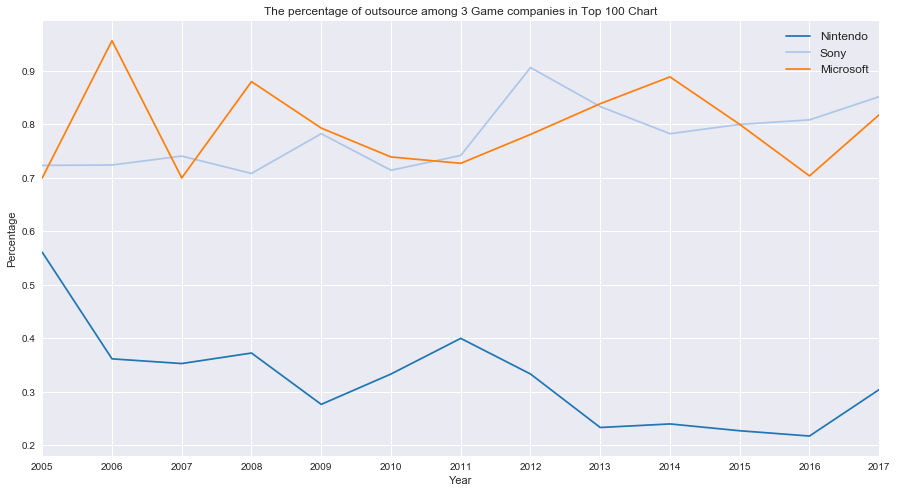

In [15]:
colors = plt.cm.tab20(np.linspace(0, 1, 20))
ax = dfnew.plot(table=False, figsize=(15,8), color=colors)

ax.set_xlabel("Year")
ax.set_ylabel("Percentage")
ax.set_xticks(np.arange(len(dfnew['Year'])))
ax.set_xticklabels(dfnew['Year'])
ax.set_title('The percentage of outsource among 3 Game companies in Top 100 Chart', fontsize=12)
plt.legend(loc='best', prop={'size':12})